# Car Depreciation Rate Prediction

### All Required Packages are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# For displaying graph in jupyter
%matplotlib inline 

## Explotary Analysis and Data Cleaning

### Dataset is Imported using pandas

In [2]:
df = pd.read_excel('cars.xlsx',sheet_name = 'Sheet4')
df.head()

MMV     Make                Model  \
0                   HyundaiI10Sportz 1.2  Hyundai                  I10   
1                HyundaiI20Magna (O) 1.2  Hyundai                  I20   
2                   HyundaiI20Sportz 1.2  Hyundai                  I20   
3  HyundaiNeo Fluidic Elantra1.6SxAtCrdi  Hyundai  Neo Fluidic Elantra   
4                   HyundaiSantro XingXo  Hyundai          Santro Xing   

         Variant       Type Fuel Type  Age Transmission   Color     Kms  \
0     Sportz 1.2  Hatchback    Petrol    3       Manual   White   12000   
1  Magna (O) 1.2  Hatchback    Petrol    9       Manual   Beige   68000   
2     Sportz 1.2  Hatchback    Petrol    8       Manual   White   31143   
3    1.6SxAtCrdi      Sedan    Diesel    2    Automatic  Silver    6000   
4             Xo  Hatchback    Petrol   11       Manual  Golden  100000   

   No of Owner  Heath score  price score  on road price  Current Price  \
0            1          8.5          8.8   5.378497e+05       338352.0   
1            1          5.0          7.3   6.138627e+05       189200.0   
2            1          6.2          4.6   6.783586e+05       347568.0   
3            1          8.5          7.9   2.228480e+06      1629250.0   
4            2          4.3          9.9   4.537194e+05        86240.0   

         Dep  
0  37.091715  
1  69.178775  
2  48.763381  
3  26.889645  
4  80.992656

### Shows basic information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 16 columns):
MMV              3879 non-null object
Make             3879 non-null object
Model            3879 non-null object
Variant          3879 non-null object
Type             3879 non-null object
Fuel Type        3879 non-null object
Age              3879 non-null int64
Transmission     3879 non-null object
Color            3879 non-null object
Kms              3879 non-null int64
No of Owner      3879 non-null int64
Heath score      3879 non-null float64
price score      3879 non-null float64
on road price    3879 non-null float64
Current Price    3879 non-null float64
Dep              3879 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 485.0+ KB


### Cheking the null values present in data

In [4]:
missing_values = df.isnull().mean()*100
print(missing_values)
print(missing_values.sum())

MMV              0.0
Make             0.0
Model            0.0
Variant          0.0
Type             0.0
Fuel Type        0.0
Age              0.0
Transmission     0.0
Color            0.0
Kms              0.0
No of Owner      0.0
Heath score      0.0
price score      0.0
on road price    0.0
Current Price    0.0
Dep              0.0
dtype: float64
0.0


### Shows some basic statistical data about dataset

In [5]:
df.describe()

Age            Kms  No of Owner  Heath score  price score  \
count  3879.000000    3879.000000  3879.000000  3879.000000  3879.000000   
mean      7.274040   56812.587523     1.226605     5.697602     6.849368   
std       2.695272   46163.397216     0.549230     1.620505     1.926978   
min       1.000000     863.000000     1.000000     3.300000     3.200000   
25%       5.000000   38000.000000     1.000000     4.500000     5.200000   
50%       7.000000   53000.000000     1.000000     5.000000     6.800000   
75%       9.000000   68575.500000     1.000000     6.800000     8.400000   
max      12.000000  854995.000000     6.000000     9.900000     9.900000   

       on road price  Current Price          Dep  
count   3.879000e+03   3.879000e+03  3879.000000  
mean    9.381424e+05   4.130298e+05    54.342586  
std     5.841469e+05   3.030802e+05    17.235352  
min     2.372747e+05   5.192000e+04     2.071667  
25%     5.378497e+05   2.335180e+05    42.215315  
50%     7.819281e+05   3.291520e+05    55.280421  
75%     1.120298e+06   4.877280e+05    67.248878  
max     1.095466e+07   2.974683e+06    92.453905

### Dropping all irrelavent column

In [6]:
df.drop(['MMV'], axis=1, inplace=True)
df.drop(['Variant'], axis=1, inplace=True)

### Change all strings present in categorical features of dataframe to lower case

In [7]:
cols_cat = list(set(df.select_dtypes(include=['object']).columns))
for i in cols_cat:
    df[i]=df[i].apply(lambda x: str.lower(str(x)))

### Checks the number of unique classes in each categorical data

In [8]:
for i in cols_cat:
    print(i,":",len(df[i].unique()))

Color : 40
Model : 66
Fuel Type : 6
Make : 4
Type : 6
Transmission : 3


### Reduces the no. of classes for Color features

In [9]:
value_counts = df['Color'].value_counts()
m = max(value_counts.values)

for i,j in zip(value_counts.index,value_counts.values):
    dif = (m - j)/m
    if dif > 0.95:
        df['Color'].replace(to_replace={i:'other'}, inplace=True)
        
print("Color :",len(df['Color'].unique()))

Color : 11


### Reduces the no. of classes for Model features

In [10]:
value_counts = df['Model'].value_counts()
m = max(value_counts.values)

for i,j in zip(value_counts.index,value_counts.values):
    dif = (m - j)/m
    if dif > 0.9:
        df['Model'].replace(to_replace={i:'other'}, inplace=True)

print("Model :",len(df['Model'].unique()))

Model : 28


### Change categorical data to category data type from object data type

In [11]:
for i in cols_cat:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 14 columns):
Make             3879 non-null category
Model            3879 non-null category
Type             3879 non-null category
Fuel Type        3879 non-null category
Age              3879 non-null int64
Transmission     3879 non-null category
Color            3879 non-null category
Kms              3879 non-null int64
No of Owner      3879 non-null int64
Heath score      3879 non-null float64
price score      3879 non-null float64
on road price    3879 non-null float64
Current Price    3879 non-null float64
Dep              3879 non-null float64
dtypes: category(6), float64(5), int64(3)
memory usage: 267.8 KB


### Separates the features on basis of data type for ploting graphs

In [12]:
col = df.columns
cols_cat = list(set(df.select_dtypes(include=['category']).columns))
cols_num = list(set(df.columns) - set(cols_cat))

###  Histogram

##### It shows the distribution of data

In [13]:
fig, axs = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(30, 30))

counter = 0
for num_column in cols_num:
    
    trace_x = counter // 2
    trace_y = counter % 2
    
    axs[trace_x, trace_y].hist(df[num_column].dropna())
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

### Barchart

##### It shows the distribution of data into different classes for a categorical data

In [14]:
fig1, axs1 = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(20, 30))

counter = 0
for num_column in cols_cat:
    value_counts = df[num_column].value_counts()
    trace_x = counter // 2
    trace_y = counter % 2
    
    x_pos = np.arange(0, len(value_counts))
    axs1[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs1[trace_x, trace_y].set_title(num_column)
    for tick in axs1[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(35)
    
    counter += 1

plt.show()

### Heatmap

##### It shows the correlation between different continuous features

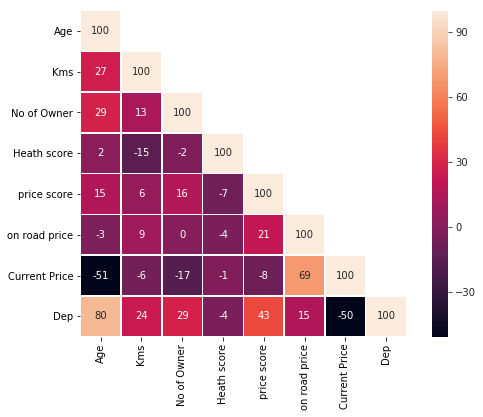

In [15]:
corr  =  df.corr()*100
f, ax = plt.subplots(figsize=(9, 6))
mask = np.ones_like(corr)
mask[np.tril_indices_from(mask)] = False
with sns.axes_style("white"):
     ax1 = sns.heatmap(corr, annot=True, fmt=".0f", linewidths=.5, mask=mask, square=True)

## Feature Engineering and Model Training

### Conversion of classes in categorical feature to dummy variables

In [16]:
df_new = df.copy()
for i in cols_cat:
    df_dummy = pd.get_dummies(df[i], prefix=i, prefix_sep='_',)
    df_new = df_new.join(df_dummy)

df_new.drop(cols_cat, axis=1, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 66 columns):
Age                                           3879 non-null int64
Kms                                           3879 non-null int64
No of Owner                                   3879 non-null int64
Heath score                                   3879 non-null float64
price score                                   3879 non-null float64
on road price                                 3879 non-null float64
Current Price                                 3879 non-null float64
Dep                                           3879 non-null float64
Color_beige                                   3879 non-null uint8
Color_black                                   3879 non-null uint8
Color_blue                                    3879 non-null uint8
Color_brown                                   3879 non-null uint8
Color_golden                                  3879 non-null uint8
Color_grey               

### Separate input features and target feature

In [17]:
X = df_new.drop('Dep',axis=1)
y = df_new[['Dep']]

### Initialize variables

In [18]:
TEST_SIZE = 0.3
RAND_STATE = 42
min_max_x=MinMaxScaler()
min_max_y=MinMaxScaler()

### Separating train and test data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

### Normalize train and test data by using MinMaxNormalization

In [20]:
X_train_norm = min_max_x.fit_transform(X_train)
y_train_norm = min_max_y.fit_transform(y_train)
X_test_norm = min_max_x.transform(X_test)
y_test_norm = min_max_y.transform(y_test)

### Training the GradientBoostingRegressor model

In [21]:
clf = GradientBoostingRegressor(learning_rate=0.3, n_estimators=300, random_state = 42)
clf.fit(X_train_norm, np.ravel(y_train_norm))
print(clf)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)


## Prediction and Model Evaluation 

### Predicting the target feature for test data

In [22]:
pred = clf.predict(X_test_norm)

### Mean Squared Error

In [23]:
print(mean_squared_error(np.ravel(y_test_norm), pred))

0.0004580781785282461


### Mean Absolute Error

In [24]:
print(mean_absolute_error(np.ravel(y_test_norm), pred))

0.015082276844292803


### Median Absolute Error

In [25]:
print(median_absolute_error(np.ravel(y_test_norm), pred))

0.01085578738519477


### Append Predicted Values to the test data

In [26]:
predicted_df = X_test.copy()
predicted_df['Dep'] = min_max_y.inverse_transform(pred.reshape(-1, 1))
predicted_df.head()

Age    Kms  No of Owner  Heath score  price score  on road price  \
1826    3  38000            1          8.1          9.8   3.218182e+06   
211    11  65000            1          5.0          4.2   8.376276e+05   
2861   10  42000            1          7.0          5.0   7.502040e+05   
410    10  58400            1          4.5          9.9   4.571741e+05   
1188    7  48000            1          8.5          4.0   2.426682e+06   

      Current Price  Color_beige  Color_black  Color_blue  ...  \
1826      2185000.0            0            0           0  ...   
211        215600.0            0            0           0  ...   
2861       260662.0            0            0           0  ...   
410        114400.0            0            0           0  ...   
1188       833782.0            0            0           0  ...   

      Type_crossover  Type_hatchback  Type_muv  Type_sedan  Type_suv  \
1826               0               0         0           0         1   
211                0               0         0           1         0   
2861               0               0         0           1         0   
410                0               1         0           0         0   
1188               0               0         0           1         0   

      Type_van  Transmission_automated manual transmission  \
1826         0                                           0   
211          0                                           0   
2861         0                                           0   
410          0                                           0   
1188         0                                           0   

      Transmission_automatic  Transmission_manual        Dep  
1826                       0                    1  31.141543  
211                        0                    1  74.603191  
2861                       0                    1  64.548282  
410                        0                    1  73.273617  
1188                       1                    0  65.557835  

[5 rows x 66 columns]

### Model Insights

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, random_state=1).fit(X_test_norm, y_test_norm)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

##### From above chart the top features which determines the depreciation rate by the model are:-
* Current Price
* On Road Price
* Age
* Price Score

##### This goes according to the common knowledge. So, the model is capturing the real world relationship.